In [1]:
import numpy as np
import pandas as pd
from os.path import join,abspath
from datetime import datetime
from scipy import stats

import matplotlib.pyplot as plt

In [2]:
# settings and filepaths
%matplotlib notebook

in_dir = '../../data/raw/temp_sensors/calibration_test_4/'

In [3]:
# functions

def load_log_elitech(fname):
    df = pd.read_excel(fname,sheetname='Data Table',skiprows=21,index_col=1,parse_dates=True)
    df = df.iloc[:,[1]]
    df.columns = ['deg_C']
    
    return df

def load_log_inkbird(fname):
    df = pd.read_excel(fname,sheetname='Records',index_col=0,parse_dates=True)
    df.columns = ['deg_C','RH']
    
    return df

In [5]:
# load temp sensor data
et_1 = load_log_elitech(join(in_dir,'1_HT_elitech.xls'))
et_2 = load_log_elitech(join(in_dir,'2_HW_elitech.xls'))
et_3 = load_log_elitech(join(in_dir,'3_CT_elitech.xls'))
et_4 = load_log_elitech(join(in_dir,'4_CW_elitech.xls'))

ib_1 = load_log_inkbird(join(in_dir,'1_HT_inkbird.xls'))
ib_2 = load_log_inkbird(join(in_dir,'2_HW_inkbird.xls'))
ib_3 = load_log_inkbird(join(in_dir,'3_CT_inkbird.xls'))

all_sensors = [et_1,et_2,et_3,et_4,ib_1,ib_2,ib_3]
ib_sensors = [ib_1,ib_2,ib_3]

In [6]:
begin_time = datetime(2017,7,16,9,15)
end_time = datetime(2017,7,17,6,30)

In [7]:
calib_times = [i.loc[:end_time,'deg_C'] for i in all_sensors]
means = [i.mean() for i in calib_times]

<IPython.core.display.Javascript object>


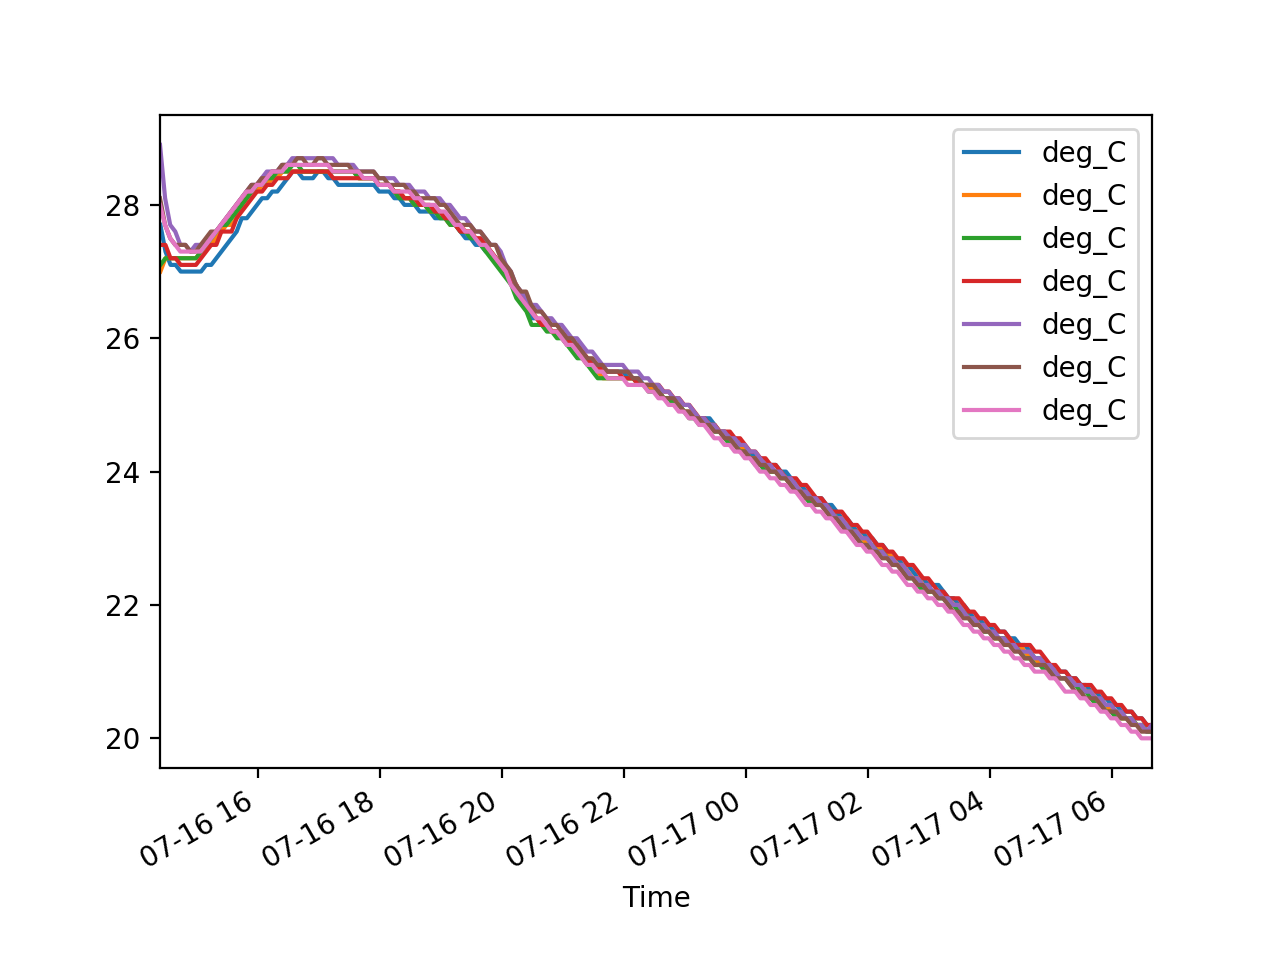

In [9]:
f,ax = plt.subplots()

[i['deg_C'].plot(ax=ax) for i in all_sensors]
plt.legend()

In [10]:
temp_vals = [np.array(i) for i in calib_times]
mean_temps = np.array(temp_vals).mean(axis=0)
mean_temps_elitech = np.array(temp_vals[:4]).mean(axis=0)

In [25]:
stats.ttest_rel(temp_vals[6],mean_temps)

Ttest_relResult(statistic=-8.5008735561207533, pvalue=5.0863303056206993e-15)

In [60]:
(temp_vals[4]-.1 - (mean_temps-(.1/7))).mean()

-7.3637702503306205e-05

## Humidity calibration

In [119]:
calib_times_rh = [i.loc[begin_time:end_time,'RH'] for i in ib_sensors]
means_rh = [i.mean() for i in calib_times_rh]

rh_vals = [np.array(i) for i in calib_times_rh]
mean_rhs = np.array(rh_vals).mean(axis=0)

In [120]:
stats.ttest_rel(rh_vals[0],mean_rhs)

Ttest_relResult(statistic=-7.4773529223218631, pvalue=9.2601321871801385e-13)

<IPython.core.display.Javascript object>


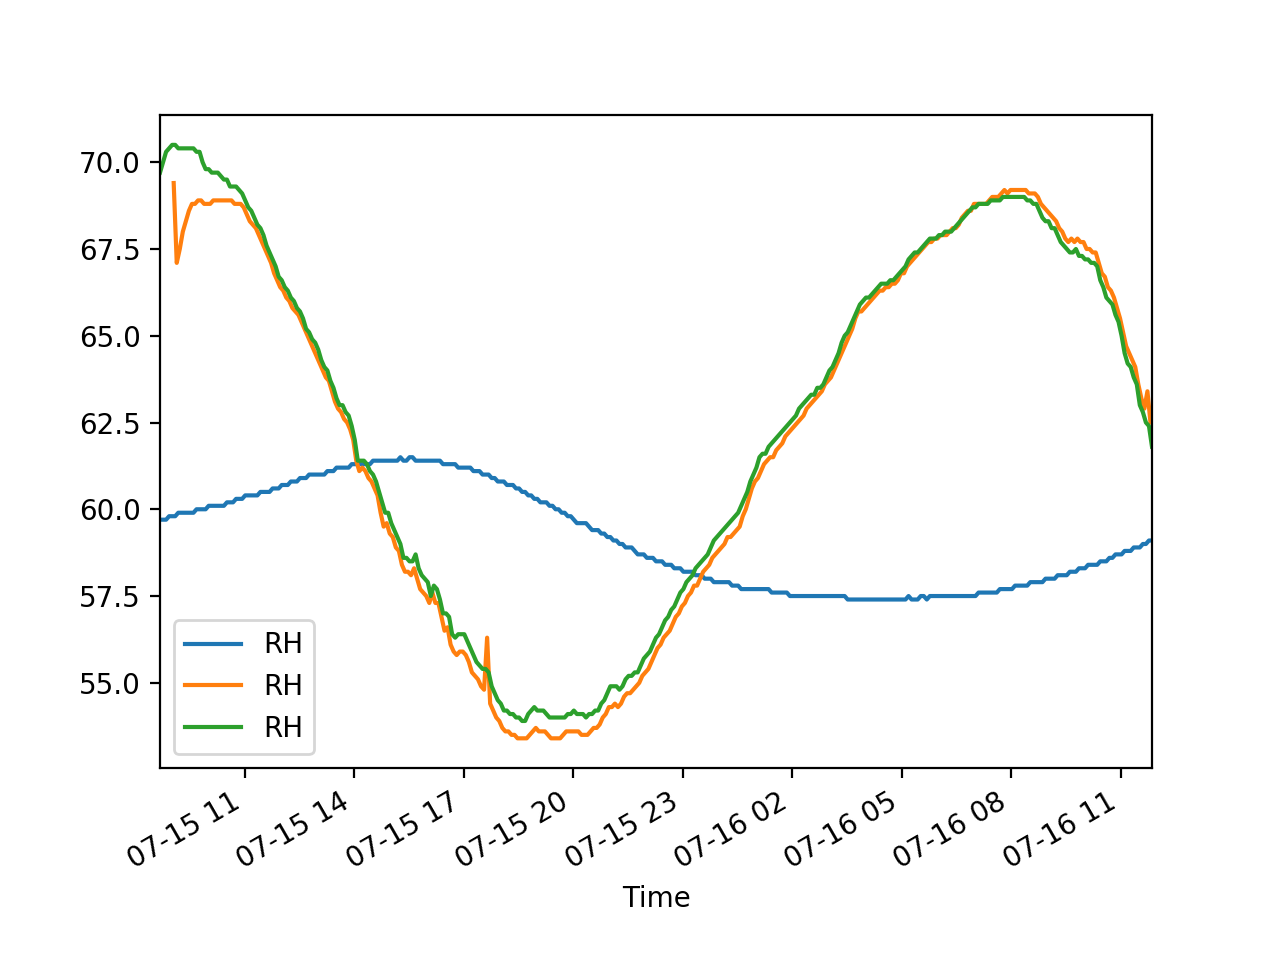

In [121]:
f,ax = plt.subplots()

[i['RH'].plot(ax=ax) for i in ib_sensors]

plt.legend()

In [128]:
ib_sensors[2]

,deg_C,RH
Time,,
2017-07-15 08:41:03,19.0,69.7
2017-07-15 08:46:03,18.7,70.0
2017-07-15 08:51:03,18.6,70.3
2017-07-15 08:56:03,18.6,70.4
2017-07-15 09:01:03,18.6,70.5
2017-07-15 09:06:03,18.7,70.5
2017-07-15 09:11:03,18.8,70.4
2017-07-15 09:16:03,18.9,70.4
2017-07-15 09:21:03,18.9,70.4
